<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-Root" data-toc-modified-id="Set-Root-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set Root</a></span></li><li><span><a href="#Leer-YAML" data-toc-modified-id="Leer-YAML-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Leer YAML</a></span></li><li><span><a href="#Data-Preparation-Buró-Centralizado" data-toc-modified-id="Data-Preparation-Buró-Centralizado-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preparation Buró Centralizado</a></span></li><li><span><a href="#Lectura-Datos" data-toc-modified-id="Lectura-Datos-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Lectura Datos</a></span></li><li><span><a href="#Transacciones" data-toc-modified-id="Transacciones-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Transacciones</a></span></li><li><span><a href="#Rechazos" data-toc-modified-id="Rechazos-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Rechazos</a></span></li><li><span><a href="#Ajustes-de-formatos" data-toc-modified-id="Ajustes-de-formatos-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Ajustes de formatos</a></span></li><li><span><a href="#Concat-de-transacciones" data-toc-modified-id="Concat-de-transacciones-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Concat de transacciones</a></span></li><li><span><a href="#Processing-Buró" data-toc-modified-id="Processing-Buró-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Processing Buró</a></span><ul class="toc-item"><li><span><a href="#Funnel" data-toc-modified-id="Funnel-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Funnel</a></span></li><li><span><a href="#Eliminacion-Variables-Nulas" data-toc-modified-id="Eliminacion-Variables-Nulas-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Eliminacion Variables Nulas</a></span></li><li><span><a href="#Cambiando-tipos-de-datos" data-toc-modified-id="Cambiando-tipos-de-datos-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Cambiando tipos de datos</a></span></li><li><span><a href="#Definición-de-Variable-Objetivo-de-Mora" data-toc-modified-id="Definición-de-Variable-Objetivo-de-Mora-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Definición de Variable Objetivo de Mora</a></span></li></ul></li><li><span><a href="#Guardar-los-parquets" data-toc-modified-id="Guardar-los-parquets-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Guardar los parquets</a></span></li><li><span><a href="#Baseline" data-toc-modified-id="Baseline-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Baseline</a></span></li></ul></div>

# Set Root

In [1]:
import os
import re

root = re.findall('.*Proyecto_GE_I', os.getcwd())[0]
os.chdir(root)

# Leer YAML

In [2]:
import yaml

with open('params.yaml', 'r') as file:
    yaml_config = yaml.safe_load(file)

# Data Preparation Buró Centralizado


Este notebook ajusta los formatos de la data que competen al modelo de scoring de buró centralizado, el output son los parquets del dataset de buro centralizado sin procesar las features (serán procesadas en un pipeline de predicción) y la varaiable `y` que es ajustable según la rigurosidad de la mora que se quiera modelar

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', size=16)
plt.rc('figure', figsize=(16, 9))
sns.set_style('whitegrid')

# Lectura Datos

In [4]:
buro_centralizado = pd.read_csv(
    yaml_config['centralizado']['folder_raw_aprobados'] +
    'Solapa Buro - Informes Generados de Manera Centralizada - Septiembre en Adelante.txt',
    sep='\t', parse_dates=['Fecha']
)

datos_personales = pd.read_csv(
    yaml_config['centralizado']['folder_raw_aprobados'] +
    'Solapa - Datos personales Clientes dados de alta 04-20 al 04-21.txt',
    sep=';', encoding='latin', index_col=0
)

moras = pd.read_csv(
    yaml_config['centralizado']['folder_raw_aprobados'] +
    'Solapa - Mora Mayo-20 a Septiembre-21 + Días.txt',
    sep=';', encoding='latin'
)

buro_centralizado.columns = (
    buro_centralizado.columns
    .str.lower()
    .str.replace(' ', '_')
)
datos_personales.columns = datos_personales.columns.str.lower()
moras.columns = moras.columns.str.lower()

C:\Users\danie\AppData\Local\Temp\ipykernel_9956\966994133.py:1: DtypeWarning: Columns (52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  buro_centralizado = pd.read_csv(
C:\Users\danie\AppData\Local\Temp\ipykernel_9956\966994133.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  buro_centralizado = pd.read_csv(


# Transacciones

In [5]:
transacciones_MC_1 = pd.read_csv(
    yaml_config['centralizado']['folder_raw_aprobados'] +
    'Solapa de Transacciones Mastercard 05-20 al 12-20.txt',
    sep=';', header=0, encoding='latin', names=[
        'id_cliente', 'id', 'fecha_alta_sistema',
        'grupo_afinidad', 'importe_total', 'codigo_mov',
        'cuotas_plan', 'cuota_vigenete', 'fecha_operacion'
    ],
)

transacciones_MC_2 = pd.read_csv(
    yaml_config['centralizado']['folder_raw_aprobados'] +
    'Solapa Transacciones Mastercard del 01-21 al 09-21.txt',
    sep=';', header=0, encoding='latin', names=[
        'id_cliente', 'id', 'fecha_alta_sistema',
        'grupo_afinidad', 'importe_total', 'codigo_mov',
        'cuotas_plan', 'cuota_vigenete', 'fecha_operacion'
    ]
)

transacciones_V = pd.read_csv(
    yaml_config['centralizado']['folder_raw_aprobados'] +
    'Solapa Transacciones Visa 05-20 al 09-21.txt',
    sep=';', encoding='latin', header=0, names=[
        'id_cliente', 'id', 'fecha_alta_sistema',
        'grupo_afinidad', 'importe_total', 'codigo_mov',
        'fecha_operacion'
    ]
)

# Rechazos

In [6]:
rechazados_MC = pd.read_csv(
    yaml_config['centralizado']['folder_raw_aprobados'] +
    'Solapa - Rechazos MC May-20 a Sep-21 (excp Dic y Mar).txt',
    sep=';', encoding='latin', index_col=0
)

rechazados_MC = pd.read_csv(
    yaml_config['centralizado']['folder_raw_aprobados'] +
    'Solapa de Rechazos Mastercard 3-21 al 7-21.txt',
    sep=';', encoding='latin', index_col=0
)

rechazados_V = pd.read_csv(
    yaml_config['centralizado']['folder_raw_aprobados'] +
    'Solapa de Rechazos Visa 3-21 al 7-21.txt',
    sep=';', encoding='latin', index_col=0
)


# Ajustes de formatos

In [7]:
transacciones_MC_1.fecha_alta_sistema = pd.to_datetime(
    arg=(
        transacciones_MC_1.fecha_alta_sistema.astype(str)
        .str.pad(6, fillchar='0')
    ),
    format='%d%m%y'
)

transacciones_MC_1.fecha_operacion = pd.to_datetime(
    transacciones_MC_1.fecha_operacion.astype(str),
    format='%Y%m%d'
)

In [8]:
transacciones_MC_2.fecha_alta_sistema = pd.to_datetime(
    arg=(
        transacciones_MC_2.fecha_alta_sistema.astype(str)
        .str.pad(6, fillchar='0')
    ),
    format='%d%m%y'
)

transacciones_MC_2.fecha_operacion = pd.to_datetime(
    transacciones_MC_2.fecha_operacion.astype(str),
    format='%Y%m%d'
)

In [9]:
transacciones_V.fecha_alta_sistema = pd.to_datetime(
    arg=(
        transacciones_V.fecha_alta_sistema.astype(str)
        .str.pad(6, fillchar='0')
    ),
    format='%d-%m-%Y'
)

transacciones_V.fecha_operacion = pd.to_datetime(
    transacciones_V.fecha_operacion.astype(str),
    format='%Y-%m-%d'
)

In [10]:
moras.replace('\$', '', regex=True, inplace=True)
moras.replace('\.', '', regex=True, inplace=True)
moras.replace(',', '.', regex=True, inplace=True)
moras.replace('\-', '', regex=True, inplace=True)
moras.replace(' ', '', regex=True, inplace=True)
moras.replace('', '0', regex=True, inplace=True)
moras.rename(columns={'id cliente':'id_cliente'}, inplace=True)
moras.set_index('id_cliente', inplace=True)
moras = moras.astype(float)
moras.index = moras.index.astype(int)

# Concat de transacciones

In [11]:
transacciones_MC = pd.concat([
    transacciones_MC_1[['id', 'id_cliente', 'fecha_alta_sistema']],
    transacciones_MC_2[['id', 'id_cliente', 'fecha_alta_sistema']]
], axis=0)

In [12]:
transacciones_MC['tipo_tarjeta'] = 'MC'
transacciones_V['tipo_tarjeta'] = 'V'
transacciones = pd.concat([transacciones_MC, transacciones_V[
    ['id', 'id_cliente', 'fecha_alta_sistema', 'tipo_tarjeta']
]], axis=0)

In [13]:
clientes_buro = buro_centralizado.index.unique()
print(
    'clientes en columna ID', clientes_buro.isin(transacciones.id).sum(), '\n'
    'clientes en columna ID Cliente', clientes_buro.isin(transacciones.id_cliente).sum(), '\n'
    'clientes en buró', clientes_buro.nunique()
)

clientes en columna ID 417496 
clientes en columna ID Cliente 232077 
clientes en buró 417597


In [14]:
clientes_personales = datos_personales.index.unique()
print(
    'clientes en columna ID', clientes_personales.isin(transacciones.id).sum(), '\n'
    'clientes en columna ID Cliente', clientes_personales.isin(transacciones.id_cliente).sum(), '\n'
    'clientes en base de datos personales', clientes_personales.nunique()
)

clientes en columna ID 329421 
clientes en columna ID Cliente 232077 
clientes en base de datos personales 329511


# Processing Buró

## Funnel

In [15]:
print('Clientes Únicos de Buró Centralizado', buro_centralizado.id_cliente.nunique())

Clientes Únicos de Buró Centralizado 125211


In [15]:
fecha_altas = transacciones.groupby('id_cliente')['fecha_alta_sistema'].max()
buro_centralizado['fecha_alta_sistema'] = buro_centralizado['id_cliente'].map(fecha_altas)
print(
    'Clientes Únicos de Buró Centralizado con Transacciones',
    buro_centralizado.query('fecha_alta_sistema.notnull()').id_cliente.nunique()
)

Clientes Únicos de Buró Centralizado con Transacciones 88771


In [16]:
buro_centralizado = buro_centralizado[
    buro_centralizado.fecha < buro_centralizado.fecha_alta_sistema
]

In [17]:
buro_centralizado = buro_centralizado[
    buro_centralizado.fecha < buro_centralizado.fecha_alta_sistema
]

print('Clientes Únicos de Buró Centralizado Buró previo a Fecha Alta Sistema', buro_centralizado.id_cliente.nunique())

buro_centralizado = (
    buro_centralizado
    .sort_values(['id_cliente', 'fecha'])
    .drop_duplicates('id_cliente', keep='last')
).set_index('id_cliente')

Clientes Únicos de Buró Centralizado Buró previo a Fecha Alta Sistema 41387


## Eliminacion Variables Nulas

Variables que sean más de 50% nulas, serán eliminadas

In [18]:
porcentaje_nulos = buro_centralizado.isnull().apply(
    lambda s: s.value_counts(True)
).T
porcentaje_nulos.columns = ['false', 'true']
variables_eliminar = porcentaje_nulos.query('true > 0.5').index

buro_centralizado_sin_nulos = (
    buro_centralizado[
        buro_centralizado.columns[
            ~buro_centralizado.columns.isin(variables_eliminar)
        ]
    ]
)
print('Variables a no considerar: \n\n',
      variables_eliminar.str.cat(sep='\n'),
      sep='')

Variables a no considerar: 

deuda_bcra_6m


## Cambiando tipos de datos

Para una fácil extracción de variables numéricas y categóricas

In [19]:
variables_categoricas = [
    'riesgo_6', 'riesgo_12', 'ip', 'riesgo_12_bis',
    'peor_sit_bcra_ult', 'peor_sit_bureau_ult', 'sit_irregular'
]


buro_centralizado[variables_categoricas] = buro_centralizado[variables_categoricas].astype('category')

## Definición de Variable Objetivo de Mora


Esta variable revisa la maxima mora que ha presentado un usuarios desde que adquirió un producto en el banco

In [20]:
mora_por_dias = moras.filter(regex='días').max(axis=1)
current_index = mora_por_dias.index
buro_index = pd.Index(buro_centralizado.index)
new_index = current_index.append(buro_index).unique()
mora_por_dias = mora_por_dias.reindex(new_index).fillna(0)
mora_por_dias = mora_por_dias.astype(int)

In [21]:
mora_por_dias.shape, buro_centralizado.shape

((97740,), (41387, 54))

In [65]:
mora_por_dias

,bad
id_cliente,
144300,30
82473,30
256520,30
77698,30
135325,30
...,...
329233,0
329250,0
329334,0


# Guardar los parquets

In [42]:
(
    mora_por_dias
    .to_frame(name='max_dias_mora')
    .to_parquet(
        yaml_config['centralizado']['folder_processed'] +
        'maxima_mora_alcanzada_buro_centralizado_with_recent_bureau.parquet'
    )
)

buro_centralizado.to_parquet(
     yaml_config['centralizado']['folder_processed'] +
    'buro_centralizado_from_data_preparation_with_recent_bureau.parquet'
)

# Baseline

In [25]:
mora_por_dias = pd.DataFrame(mora_por_dias, columns=['bad'])

In [29]:
df = buro_centralizado.merge(mora_por_dias, how='left',left_index=True, right_index=True)

In [42]:
df_gr = df.bad.value_counts(dropna=False, normalize=True).reset_index().rename(columns={'index':'dias_mora','bad':'porcentaje'})

In [45]:
df_gr = df_gr.sort_values(['dias_mora'], ascending=False)

In [47]:
df_gr['porc_cum'] = df_gr['porcentaje'].cumsum()

In [62]:
df_gr = df_gr[df_gr["dias_mora"]!=0]

<AxesSubplot:xlabel='dias_mora', ylabel='porc_cum'>

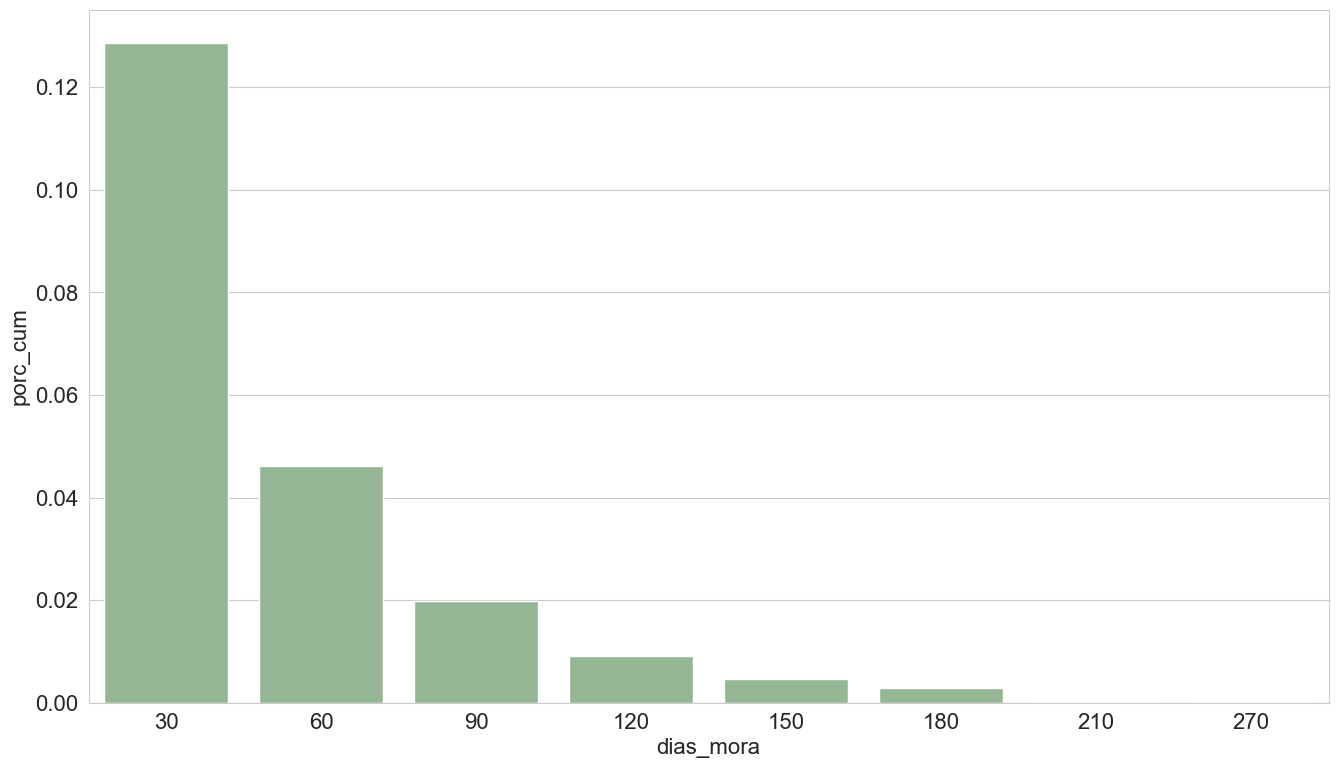

In [64]:
sns.barplot(x = df_gr["dias_mora"], y = df_gr['porc_cum'],
            color = "darkseagreen",
            saturation = 0.75)

C:\Users\danie\AppData\Local\Temp\ipykernel_9956\3853865584.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot:>

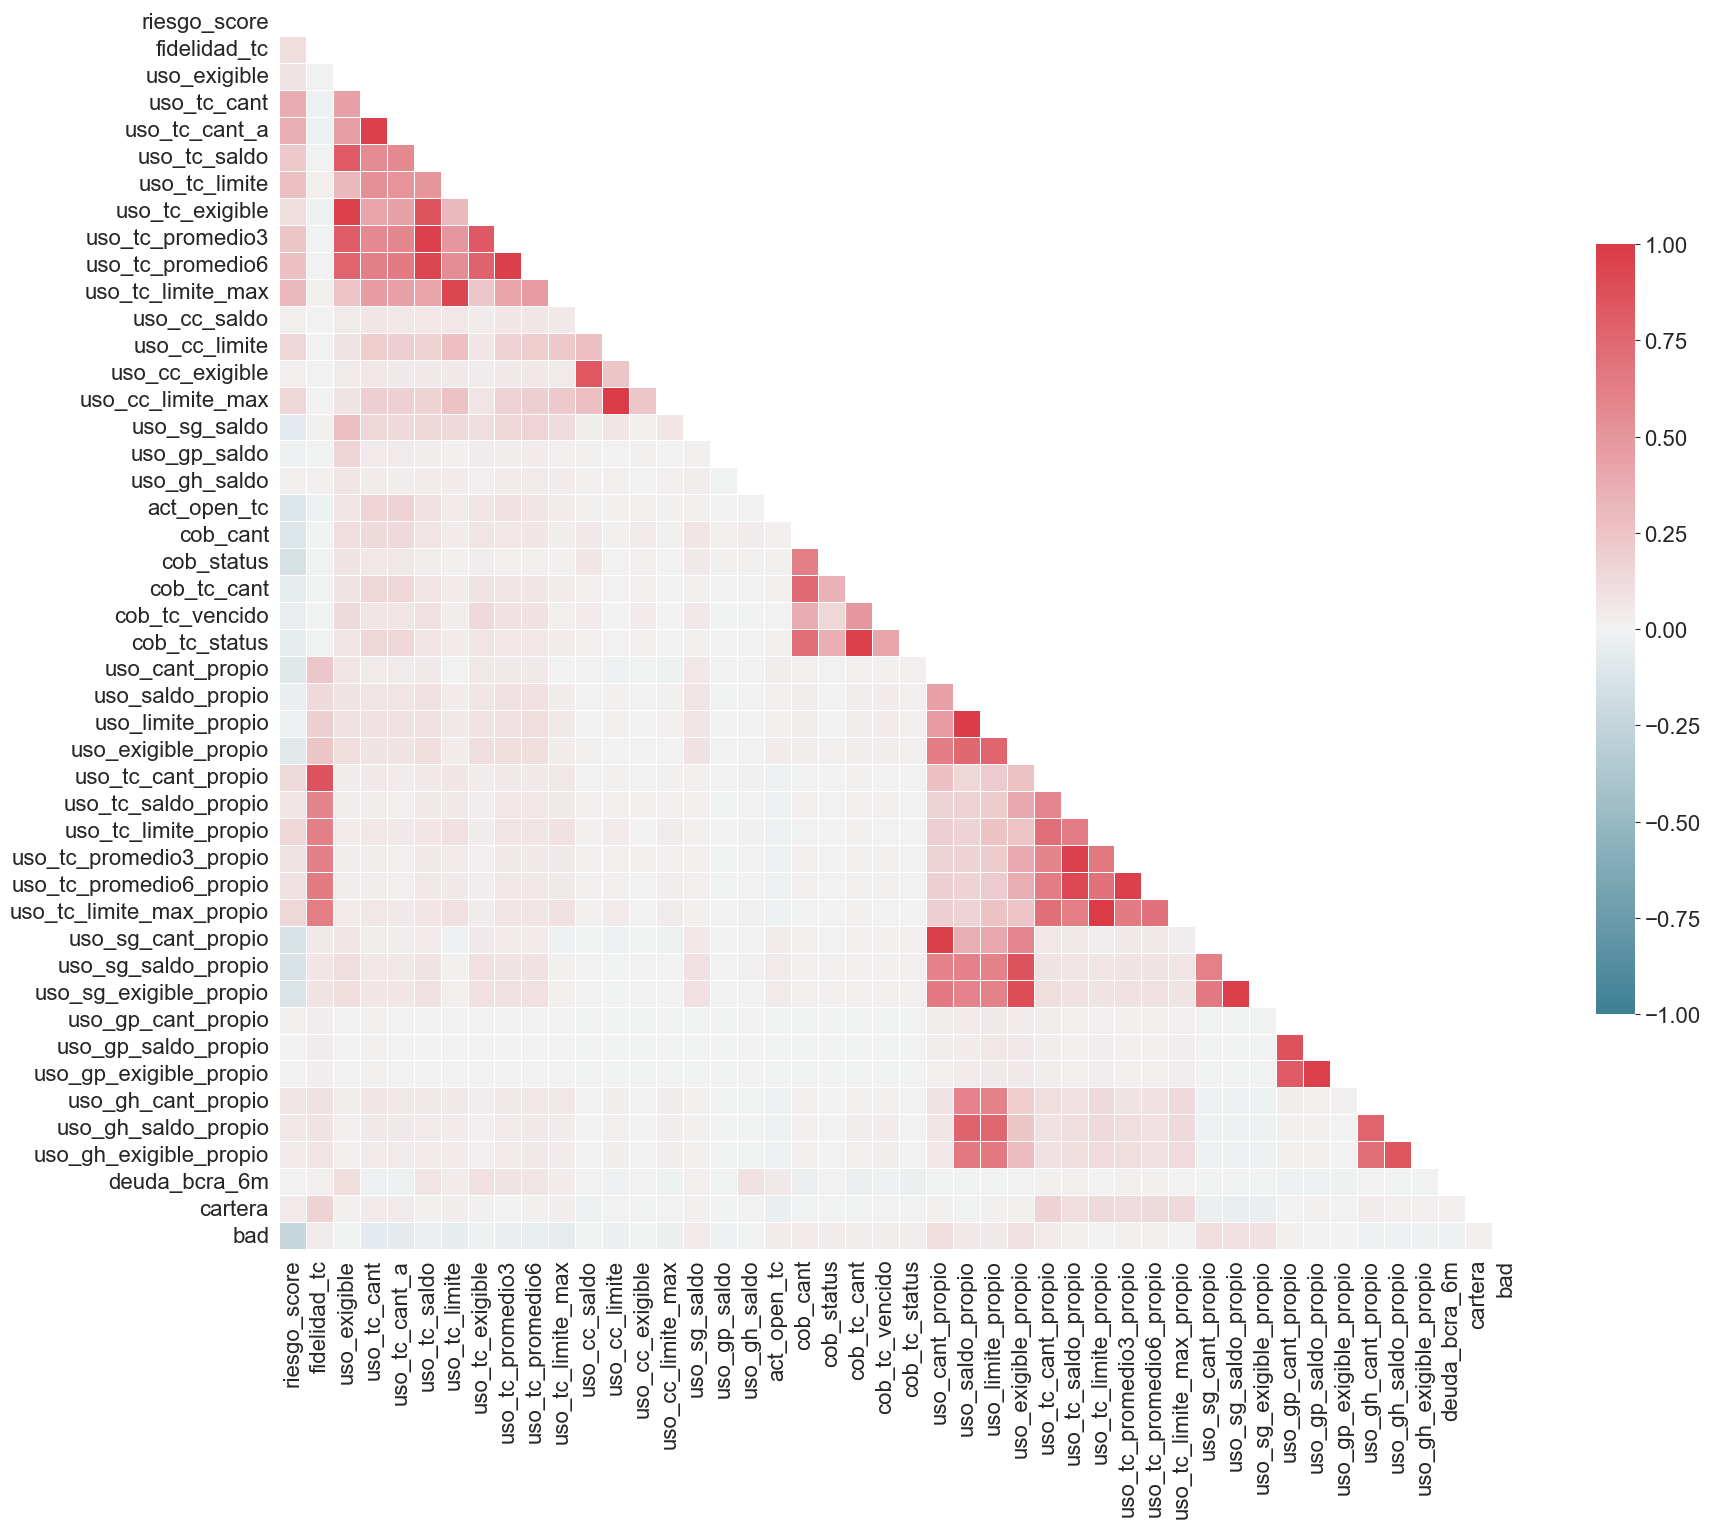

In [61]:
# Matriz de correlación
corr = df.corr()

# corr = train_x.join(train_y).corr()
# corr

# Mapa de calor de la matriz de correlación
# sns.heatmap(correlation_matrix, annot=True)

f, ax = plt.subplots(figsize=(20,20))

# Mapa de colores
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Borramos la parte diagonal superior con una máscara
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, center=0, mask=mask, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

se evalua la correlación que tienen las variables categóricas y la variable objetivo.

In [33]:
from scipy.stats import chi2_contingency
from typing import List

def calcular_coeficiente_contingencia(df: pd.DataFrame, cols: List[str], target_col: str) -> pd.DataFrame:
    resultados = []
    for col in cols:
        tabla_contingencia = pd.crosstab(df[col], df[target_col])
        chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
        n = tabla_contingencia.values.sum()
        coef_contingencia = np.sqrt(chi2 / (n * min(len(tabla_contingencia.index) - 1, len(tabla_contingencia.columns) - 1)))
        resultados.append([col, coef_contingencia])
    df_resultado = pd.DataFrame(resultados, columns=['Variable', 'Coeficiente de Contingencia'])
    df_resultado.sort_values(by='Coeficiente de Contingencia', ascending=False, inplace=True)
    df_resultado.reset_index(drop=True, inplace=True)
    return df_resultado.round(4)

variables_categoricas = [
    'riesgo_6', 'riesgo_12', 'ip', 'riesgo_12_bis',
    'peor_sit_bcra_ult', 'peor_sit_bureau_ult',  'cartera', 
    'sit_irregular'
]

calcular_coeficiente_contingencia(df, variables_categoricas, 'bad' )

,Variable,Coeficiente de Contingencia
0,riesgo_12,0.1273
1,sit_irregular,0.1060
2,riesgo_12_bis,0.0968
3,riesgo_6,0.0708
4,peor_sit_bcra_ult,0.0603
5,cartera,0.0345
6,peor_sit_bureau_ult,0.0299
7,ip,0.0289
